<a href="https://colab.research.google.com/github/amindazad/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] If you haven't completed assignment #1, please do so first.
- [X] Continue to clean and explore your data. Make exploratory visualizations.
- [X] Fit a model. Does it beat your baseline? 
- [X] Try xgboost.
- [X] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [2]:
!pip install pandas-profiling==2.*
!pip install category_encoders==2.*
!pip install eli5

     |████████████████████████████████| 194kB 3.3MB/s 
     |████████████████████████████████| 614kB 40.6MB/s 
     |████████████████████████████████| 1.5MB 39.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 235kB 47.3MB/s 
     |████████████████████████████████| 307kB 47.4MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 215kB 47.2MB/s 
     |████████████████████████████████| 747kB 44.0MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=4fe395353f6e4de849ed870f35b5d6806c2d8f2cd07fb50b945e98268f704680
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=17487 sha256=deb5a6fa4761d5dfb1a6836

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 112kB 3.4MB/s 


In [3]:
# Import the dataset 
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/amindazad/ATP_ITF_TennisMatch_Winner/master/all_matches.csv', header=1)
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,sets_won,games_won,games_against,tiebreaks_won,tiebreaks_total,serve_rating,aces,double_faults,first_serve_made,first_serve_attempted,first_serve_points_made,first_serve_points_attempted,second_serve_points_made,second_serve_points_attempted,break_points_saved,break_points_against,service_games_won,return_rating,first_serve_return_points_made,first_serve_return_points_attempted,second_serve_return_points_made,second_serve_return_points_attempted,break_points_made,break_points_attempted,return_games_played,service_points_won,service_points_attempted,return_points_won,return_points_attempted,total_points_won,total_points,duration,player_victory,retirement,seed,won_first_set,doubles,masters,round_num
0,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,adriano-ferreira_eduardo-frick,NaN,frank-clausing_maarten-kamermans,NaN,netherlands-f1-futures_itf_procircuit0,Round of 16,2,2,12,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN,t,t,25,4
1,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,adriano-ferreira_eduardo-frick,NaN,kalle-flygt_lars-zimmermann,NaN,netherlands-f1-futures_itf_procircuit0,Quarter-Finals,3,1,13,15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,t,t,25,5
2,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,alan-mackin,NaN,bobbie-altelaar,NaN,netherlands-f1-futures_itf_procircuit0,Round of 32,2,2,12,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN,t,f,25,3
3,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,alan-mackin,NaN,pavel-snobel,NaN,netherlands-f1-futures_itf_procircuit0,Round of 16,2,0,7,13,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,f,f,25,4
4,2000-08-28,2000-09-03,NED,Clay,NaN,NaN,2000,alan-mackin_luben-pampoulov,NaN,johan-dijkstra_marck-philippen,NaN,netherlands-f1-futures_itf_procircuit0,Round of 16,3,1,12,14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,f,t,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54145,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,walter-trusendi,W. Trusendi,markus-eriksson,M. Eriksson,cordenons_challenger,2nd Round Qualifying,2,0,5,12,0,0,206.0,1.0,3.0,22.0,49.0,14.0,22.0,10.0,27.0,3.0,6.0,8.0,66.0,6.0,32.0,15.0,32.0,0.0,3.0,9.0,24.0,49.0,21.0,64.0,45.0,113.0,01:29:00,f,f,NaN,f,f,100,1
54146,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,walter-trusendi,W. Trusendi,sem-verbeek,S. Verbeek,cordenons_challenger,1st Round Qualifying,2,2,12,3,0,0,279.0,0.0,2.0,17.0,41.0,14.0,17.0,17.0,24.0,2.0,3.0,8.0,252.0,10.0,24.0,16.0,21.0,5.0,8.0,7.0,31.0,41.0,26.0,45.0,57.0,86.0,01:07:00,t,f,NaN,t,f,100,0
54147,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,carlos-gomez-herrera,C. Gomez-Herrera,cordenons_challenger,Round of 32,2,2,12,7,0,0,287.0,1.0,0.0,47.0,59.0,32.0,47.0,6.0,12.0,5.0,6.0,9.0,164.0,23.0,53.0,9.0,18.0,4.0,13.0,10.0,38.0,59.0,32.0,71.0,70.0,130.0,01:26:00,t,f,6,t,f,100,3
54148,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,francesco-forti,F. Forti,cordenons_challenger,Round of 16,2,2,12,5,0,0,243.0,2.0,2.0,30.0,49.0,19.0,30.0,10.0,19.0,1.0,4.0,9.0,258.0,20.0,30.0,10.0,18.0,6.0,10.0,8.0,29.0,49.0,30.0,48.0,59.0,97.0,01:08:00,t,f,6,t,f,100,4


In [4]:
# Choose my target 
target = 'player_victory'
# I want to predict tennis match winner based on the match data, my target is catagorical (True/False)
# Hence -> Classification 

# Take a look at the target 
df['player_victory'].describe()

count     54150
unique        2
top           t
freq      27076
Name: player_victory, dtype: object

In [5]:
# Choosing a baseline and look at the distribution to start 

df['player_victory'].value_counts(normalize=True)
# They are both very close not tot imbalanced , I'm going to choose T(Win)=50% as baseline

t    0.500018
f    0.499982
Name: player_victory, dtype: float64

In [6]:
df['player_victory'].nunique()
# As mentioned earlier, only two classes so classification problem

2

In [7]:
df.dtypes

start_date                               object
end_date                                 object
location                                 object
court_surface                            object
prize_money                             float64
currency                                 object
year                                      int64
player_id                                object
player_name                              object
opponent_id                              object
opponent_name                            object
tournament                               object
round                                    object
num_sets                                  int64
sets_won                                  int64
games_won                                 int64
games_against                             int64
tiebreaks_won                             int64
tiebreaks_total                           int64
serve_rating                            float64
aces                                    

In [0]:
from pandas_profiling import ProfileReport

#Check out the NaN values distribution among all variables 
#profile = ProfileReport(df)
#profile

In [9]:
# Check out NaN values 
df.isnull().sum().sort_values()
# Seems like most of the features we want to use have the same number of NaN values 

start_date                                  0
doubles                                     0
retirement                                  0
player_victory                              0
masters                                     0
tiebreaks_total                             0
tiebreaks_won                               0
games_against                               0
games_won                                   0
sets_won                                    0
num_sets                                    0
round                                       0
round_num                                   0
opponent_id                                 0
end_date                                    0
player_id                                   0
year                                        0
location                                    0
court_surface                               0
tournament                                  0
won_first_set                             714
seed                              

In [10]:
# Lets drop them
df_cleaned = df.dropna()
df_cleaned

,start_date,end_date,location,court_surface,prize_money,currency,year,player_id,player_name,opponent_id,opponent_name,tournament,round,num_sets,sets_won,games_won,games_against,tiebreaks_won,tiebreaks_total,serve_rating,aces,double_faults,first_serve_made,first_serve_attempted,first_serve_points_made,first_serve_points_attempted,second_serve_points_made,second_serve_points_attempted,break_points_saved,break_points_against,service_games_won,return_rating,first_serve_return_points_made,first_serve_return_points_attempted,second_serve_return_points_made,second_serve_return_points_attempted,break_points_made,break_points_attempted,return_games_played,service_points_won,service_points_attempted,return_points_won,return_points_attempted,total_points_won,total_points,duration,player_victory,retirement,seed,won_first_set,doubles,masters,round_num
19719,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,adrian-mannarino,A. Mannarino,matthias-bachinger,M. Bachinger,loughborough_challenger,Round of 32,3,1,10,16,0,0,218.0,2.0,4.0,49.0,90.0,29.0,49.0,19.0,41.0,10.0,15.0,13.0,185.0,10.0,42.0,13.0,28.0,2.0,2.0,13.0,48.0,90.0,23.0,70.0,71.0,160.0,01:42:00,f,f,2,f,f,100,3
19720,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,alexander-slabinsky,A. Slabinsky,luke-bambridge,L. Bambridge,loughborough_challenger,2nd Round Qualifying,2,2,12,4,0,0,282.0,3.0,2.0,30.0,46.0,22.0,30.0,9.0,16.0,1.0,2.0,8.0,228.0,11.0,30.0,19.0,24.0,5.0,10.0,8.0,31.0,46.0,30.0,54.0,61.0,100.0,00:56:00,t,f,4,t,f,100,1
19721,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,alexander-slabinsky,A. Slabinsky,sean-thornley,S. Thornley,loughborough_challenger,3rd Round Qualifying,2,0,11,14,0,1,252.0,3.0,2.0,45.0,76.0,31.0,45.0,15.0,31.0,1.0,4.0,12.0,124.0,13.0,41.0,18.0,42.0,2.0,6.0,12.0,46.0,76.0,31.0,83.0,77.0,159.0,01:36:00,f,f,4,f,f,100,2
19726,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,andreas-haider-maurer,A. Haider-Maurer,james-ward,J. Ward,loughborough_challenger,Quarter-Finals,2,0,5,12,0,0,236.0,7.0,2.0,23.0,47.0,20.0,23.0,8.0,24.0,4.0,7.0,8.0,51.0,7.0,29.0,6.0,22.0,0.0,3.0,9.0,28.0,47.0,13.0,51.0,41.0,98.0,01:07:00,f,f,3,f,f,100,5
19727,2010-11-08,2010-11-14,United Kingdom of Great Britain and Northern I...,Hard,42500.0,€,2010,andreas-haider-maurer,A. Haider-Maurer,sean-thornley,S. Thornley,loughborough_challenger,Round of 32,2,2,12,3,0,0,300.0,4.0,3.0,24.0,46.0,20.0,24.0,14.0,22.0,1.0,1.0,8.0,224.0,9.0,18.0,12.0,20.0,4.0,7.0,7.0,34.0,46.0,21.0,38.0,55.0,84.0,00:59:00,t,f,3,t,f,100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54143,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,tommy-robredo,T. Robredo,lorenzo-giustino,L. Giustino,cordenons_challenger,Round of 32,2,2,13,7,1,1,237.0,3.0,7.0,30.0,66.0,22.0,30.0,19.0,36.0,3.0,6.0,10.0,236.0,13.0,32.0,18.0,26.0,5.0,7.0,9.0,41.0,66.0,31.0,58.0,72.0,124.0,01:31:00,t,f,5,t,f,100,3
54144,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,tommy-robredo,T. Robredo,paolo-lorenzi,P. Lorenzi,cordenons_challenger,Quarter-Finals,2,0,6,12,0,0,234.0,1.0,1.0,38.0,51.0,22.0,38.0,6.0,13.0,2.0,6.0,9.0,104.0,9.0,29.0,11.0,26.0,1.0,5.0,9.0,28.0,51.0,20.0,55.0,48.0,106.0,01:18:00,f,f,5,f,f,100,5
54147,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,carlos-gomez-herrera,C. Gomez-Herrera,cordenons_challenger,Round of 32,2,2,12,7,0,0,287.0,1.0,0.0,47.0,59.0,32.0,47.0,6.0,12.0,5.0,6.0,9.0,164.0,23.0,53.0,9.0,18.0,4.0,13.0,10.0,38.0,59.0,32.0,71.0,70.0,130.0,01:26:00,t,f,6,t,f,100,3
54148,2018-08-13,2018-08-19,Italy,Clay,64000.0,€,2018,zdenek-kolar,Z. Kolar,francesco-forti,F. Forti,cordenons_challenger,Round of 16,2,2,12,5,0,0,243.0,2.0,2.0,30.0,49.0,19.0,30.0,10.0,19.0,1.0,4.0,9.0,25

In [11]:
# Choosing the features

# I'm going to cosider all features in our dataset are important and later on
# We're going to remove the ones with high cardinality, leakage through our data 
# Cleaning and Wrangling process

# Lets first divide the data randomly using train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_cleaned, train_size=0.85, test_size=0.15, 
                              stratify=df_cleaned['player_victory'], random_state=42)

train, val = train_test_split(train, train_size=0.85, test_size=0.15, stratify=train['player_victory'],
                               random_state=42)

train.shape, val.shape, test.shape

((4251, 53), (751, 53), (883, 53))

In [12]:
# Define a funcltion to wrangle all our datasets and do make feature engeering easier
def wrangle(X) :
  #Prevent SettingWithCopyWarning
  X=X.copy()
  #convert Start_date and End_date , duration and Year to datetime format 
  X['start_date'] = pd.to_datetime(X['start_date'], infer_datetime_format=True)
  X['end_date'] = pd.to_datetime(X['end_date'], infer_datetime_format=True)
  #X['year'] = pd.to_datetime(X['year'], infer_datetime_format=True)
  #X['duration'] = pd.to_datetime(X['duration'], infer_datetime_format=True)
  #X['duration'] = pd.DatetimeIndex(X['duration'])
  return X 

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape, val.shape, test.shape

((4251, 53), (751, 53), (883, 53))

In [0]:
#drop target from train
train_features = train.drop(columns=[target])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [14]:
# Lets try a shallow decision tree as a fast first model
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=3))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9920106524633822

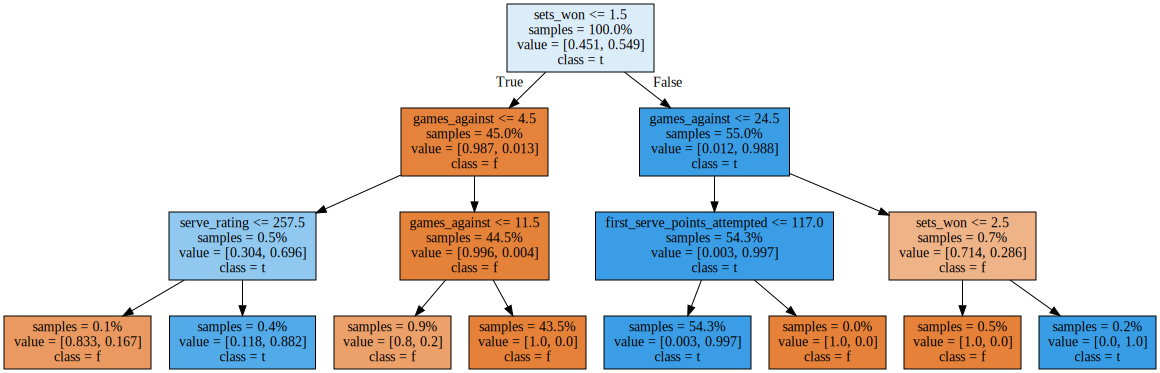

In [15]:
# Probably has a leakage, too good to be true 
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [16]:
# Let's remove year, our goal is to predict the winner based on match statistics 
# not the year it took place 

train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against',
                                     'total_points_won', 'year'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier(max_depth=4))

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9174434087882823

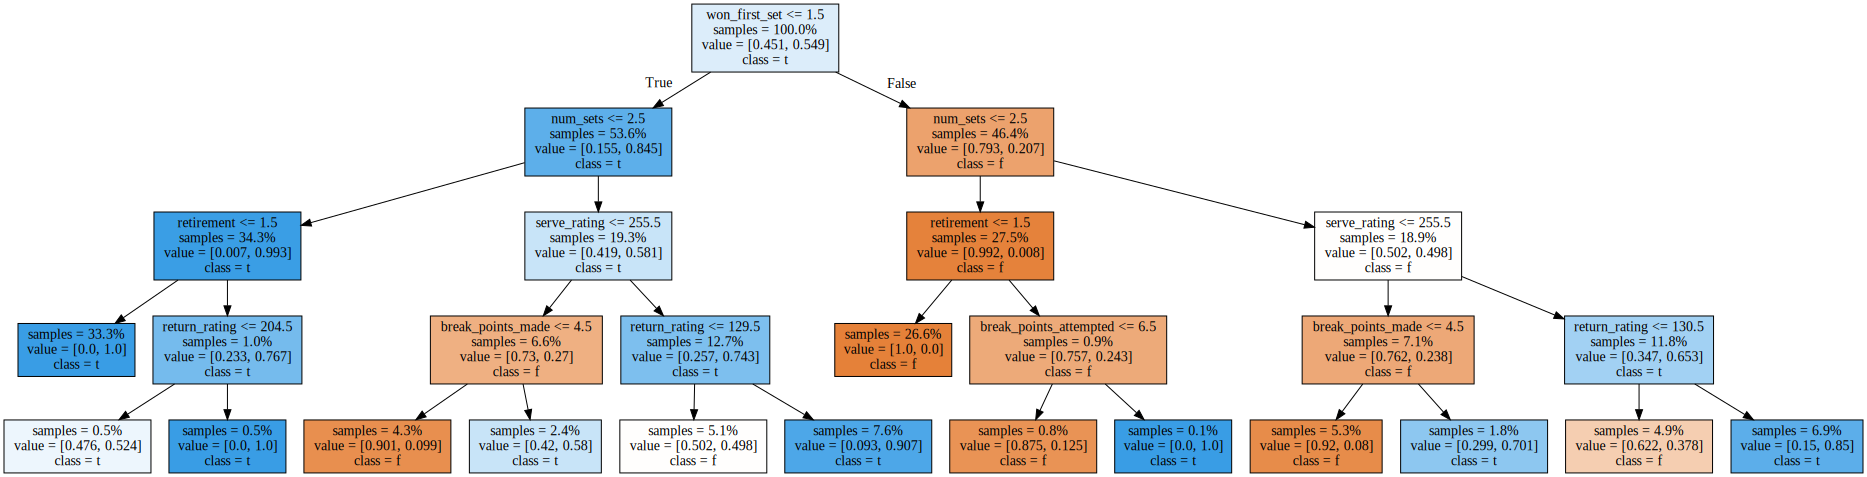

In [17]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [18]:
# We're pretty good now, I'm gonna come back and remove all the columns 
# that are not related to match stats and try again, use some domain experties!

# For now lets move on and calculate our ROC AUC, our initial baseline and decisiontree
# are good eval metrics but just in case 

from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]
roc_auc_score(y_val, y_pred_proba)

0.9729322393103647

In [0]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(train, minimal=True).to_notebook_iframe()
#profile

In [20]:
# Lets remove everything but the match stats and prize info from features

train_features = train.drop(columns=[target,'sets_won', 'games_won', 'games_against',
                                     'total_points_won', 'year', 'currency', 'location',
                                     'player_name', 'opponent_id', 'player_id', 'opponent_name',
                                     'tournament', 'total_points', 'retirement', 'doubles'])
#create a list of numeric columns 
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#create a list of cardinality for non numeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()
#remove high cardinality
catagorical_features = cardinality[cardinality<=50].index.tolist()
#combine lists
features = numeric_features+catagorical_features

#set matrixes and vectors
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(ce.OrdinalEncoder(),DecisionTreeClassifier())

pipeline.fit(X_train, y_train)
pipeline.score(X_val, y_val)

0.9134487350199734

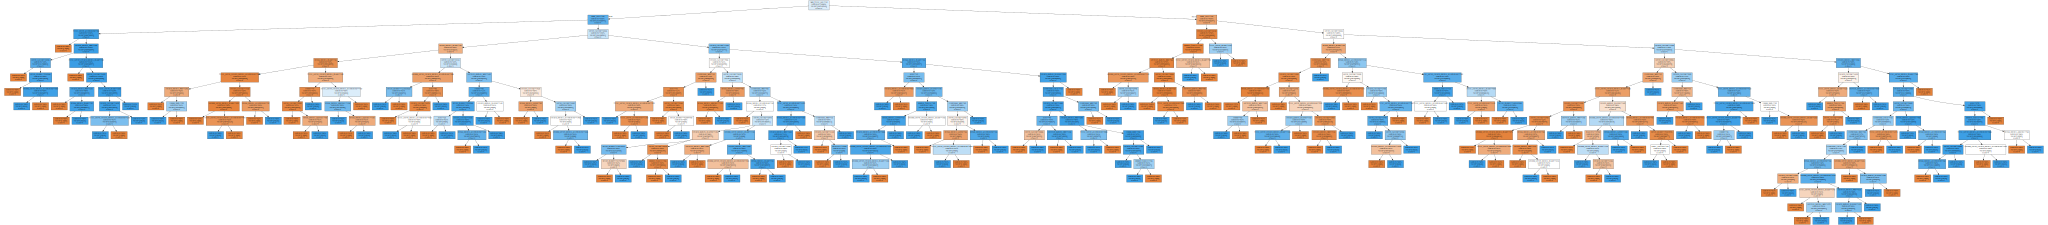

In [21]:
tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,out_file=None ,
                           feature_names=X_train.columns,
                           class_names=y_train.unique().astype(str),
                           filled=True,impurity=False, proportion=True)

graphviz.Source(dot_data)

In [22]:
import plotly.express as px 
px.scatter_3d(train, x='player_victory', y='num_sets', z='serve_rating', color='prize_money')

In [23]:
px.scatter(train, x='player_victory', y='serve_rating', color='prize_money')

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9587217043941412


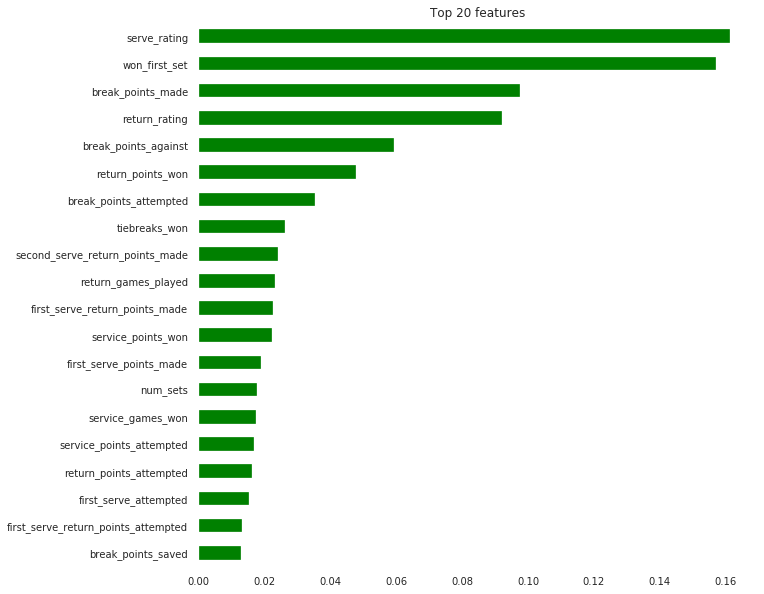

In [25]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

In [26]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [28]:
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.0756 ± 0.0126,serve_rating
0.0546 ± 0.0108,won_first_set
0.0386 ± 0.0115,return_rating
0.0383 ± 0.0039,break_points_made
0.0218 ± 0.0027,tiebreaks_won
0.0146 ± 0.0098,service_points_won
0.0120 ± 0.0061,return_points_won
0.0107 ± 0.0056,first_serve_points_made
0.0075 ± 0.0055,break_points_attempted
0.0059 ± 0.0013,num_sets


In [29]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9547270306258322


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

# 1% increase using boosting !!! Hoorraaaaaay ! 

Validation Accuracy 0.9693741677762983


In [34]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000, 
    max_depth=7,     
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error', 
          early_stopping_rounds=50)

[0]	validation_0-error:0.049635	validation_1-error:0.073236
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.038109	validation_1-error:0.071904
[2]	validation_0-error:0.028699	validation_1-error:0.069241
[3]	validation_0-error:0.021407	validation_1-error:0.071904
[4]	validation_0-error:0.014585	validation_1-error:0.045273
[5]	validation_0-error:0.011527	validation_1-error:0.050599
[6]	validation_0-error:0.006822	validation_1-error:0.047936
[7]	validation_0-error:0.005646	validation_1-error:0.043941
[8]	validation_0-error:0.00494	validation_1-error:0.043941
[9]	validation_0-error:0.003999	validation_1-error:0.039947
[10]	validation_0-error:0.002117	validation_1-error:0.041278
[11]	validation_0-error:0.001176	validation_1-error:0.041278
[12]	validation_0-error:0.000706	validation_1-error:0.041278
[13]	validation_0-error:0.00047	validation_1-error:0.0399

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

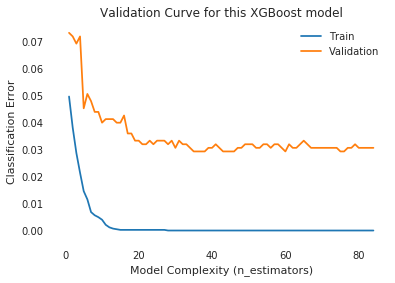

In [52]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
plt.legend();